# Correctness checks for the converted data
Here I will check whether new datasets I created from the initial ones were processed correctly.<br>
**What is to be checked:**
- Unpack a few rows - are the intended graphemes visible?
- Look whether the index is continuous
- Do the indexes and labels line up with the ones from the `.parquet` files?

In [1]:
# Python libraries
import os

# External libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Constants
DATA_PATH = os.path.join('data', 'bengaliai-cv19')
ORIG_DIMS = (137, 236)
NEW_DIMS = (32, 32)

## Load data

In [2]:
# Converted low resolutiond data
train_data_low_res = pd.read_parquet(os.path.join('..', DATA_PATH, '32by32-y-and-X.parquet'))
train_y_low_res = train_data_low_res[train_data_low_res.columns[:3]]
train_X_low_res = train_data_low_res[train_data_low_res.columns[3:]]
del train_data_low_res

# Original high resolution data - first batch
train_X_high_res = pd.read_parquet(os.path.join('..', DATA_PATH, 'train_image_data_0.parquet'))
train_y_high_res = pd.read_csv(os.path.join('..', DATA_PATH, 'train.csv'), index_col = 0)
train_index_high_res = train_X_high_res['image_id']
train_X_high_res.drop('image_id', axis = 'columns', inplace = True)
train_X_high_res.index = train_index_high_res

## Check whether graphemes are visible

In [3]:
display(train_y_low_res.head(5))
display(train_X_low_res.head(5))

,grapheme_root,vowel_diacritic,consonant_diacritic
image_id,,,
Train_0,15,9,5
Train_1,159,0,0
Train_2,22,3,5
Train_3,53,2,2
Train_4,71,9,5


,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_1014,px_1015,px_1016,px_1017,px_1018,px_1019,px_1020,px_1021,px_1022,px_1023
image_id,,,,,,,,,,,,,,,,,,,,,
Train_0,0.001906,0.000415,0.002600,0.002258,0.005785,0.006871,0.006949,0.005463,0.005430,0.005643,...,0.007843,0.007595,0.007600,0.012327,0.012198,0.010220,0.009887,0.007509,0.008277,0.007803
Train_1,0.018667,0.023037,0.013929,0.023317,0.026868,0.008661,0.010723,0.019810,0.005714,0.023165,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Train_2,0.006062,0.008249,0.007255,0.007739,0.009229,0.018156,0.007934,0.006819,0.008034,0.000859,...,0.019438,0.008955,0.012067,0.007652,0.003685,0.007510,0.013560,0.013233,0.011498,0.005685
Train_3,0.009222,0.015793,0.018369,0.012095,0.015235,0.026717,0.018427,0.033407,0.027796,0.570809,...,0.005695,0.004757,-0.000370,0.001346,0.010515,0.004436,0.004871,0.004764,0.006612,0.007523
Train_4,0.019138,0.016926,0.021465,0.011470,0.037868,0.023061,0.000537,0.008053,0.011582,0.037127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
display(train_y_high_res.head(5))
display(train_X_high_res.head(5))

,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
image_id,,,,
Train_0,15,9,5,ক্ট্রো
Train_1,159,0,0,হ
Train_2,22,3,5,খ্রী
Train_3,53,2,2,র্টি
Train_4,71,9,5,থ্রো


,0,1,2,3,4,5,6,7,8,9,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
image_id,,,,,,,,,,,,,,,,,,,,,
Train_0,254,253,252,253,251,252,253,251,251,253,...,253,253,253,253,253,253,253,253,253,251
Train_1,251,244,238,245,248,246,246,247,251,252,...,255,255,255,255,255,255,255,255,255,254
Train_2,251,250,249,250,249,245,247,252,252,252,...,254,253,252,252,253,253,253,253,251,249
Train_3,247,247,249,253,253,252,251,251,250,250,...,254,254,254,254,254,253,253,252,251,252
Train_4,249,248,246,246,248,244,242,242,229,225,...,255,255,255,255,255,255,255,255,255,255


Targets for low resolution image:


grapheme_root          139
vowel_diacritic          3
consonant_diacritic      0
Name: Train_7, dtype: int64

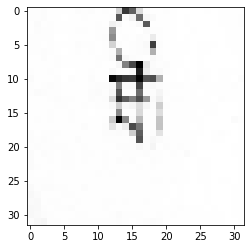

In [5]:
y_6_low_res = train_y_low_res.iloc[7]
print('Targets for low resolution image:')
display(y_6_low_res)

grapheme_6_low_res = train_X_low_res.iloc[7].to_numpy()
grapheme_6_low_res = grapheme_6_low_res.reshape(NEW_DIMS)
plt.imshow(grapheme_6_low_res, cmap = 'Greys')

Targets for low resolution image:


grapheme_root          44
vowel_diacritic         0
consonant_diacritic     0
Name: Train_33, dtype: int64

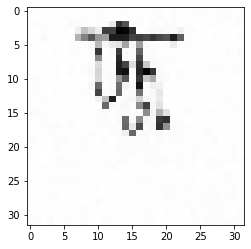

In [6]:
y_32_low_res = train_y_low_res.iloc[33]
print('Targets for low resolution image:')
display(y_32_low_res)

grapheme_32_low_res = train_X_low_res.iloc[33].to_numpy()
grapheme_32_low_res = grapheme_32_low_res.reshape(NEW_DIMS)
plt.imshow(grapheme_32_low_res, cmap = 'Greys')

Yay! The structure is still visible. But does it look like its high resolution counterpart?

Target for high resolution image:


grapheme_root          139
vowel_diacritic          3
consonant_diacritic      0
grapheme                ষী
Name: Train_7, dtype: object

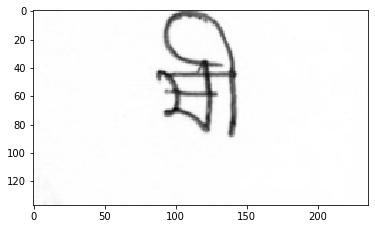

In [7]:
y_6_high_res = train_y_high_res.iloc[7]
print('Target for high resolution image:')
display(y_6_high_res)

grapheme_6_high_res = train_X_high_res.iloc[7].to_numpy()
grapheme_6_high_res = grapheme_6_high_res.reshape(ORIG_DIMS)
grapheme_6_high_res = grapheme_6_high_res / 255.0
grapheme_6_high_res = 1.0 - grapheme_6_high_res
plt.imshow(grapheme_6_high_res, cmap = 'Greys')

Target for high resolution image:


grapheme_root           44
vowel_diacritic          0
consonant_diacritic      0
grapheme               জ্জ
Name: Train_33, dtype: object

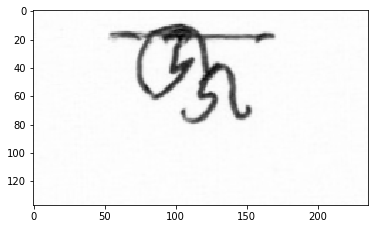

In [8]:
y_32_high_res = train_y_high_res.iloc[33]
print('Target for high resolution image:')
display(y_32_high_res)

grapheme_32_high_res = train_X_high_res.iloc[33].to_numpy()
grapheme_32_high_res = grapheme_32_high_res.reshape(ORIG_DIMS)
grapheme_32_high_res = grapheme_32_high_res / 255.0
grapheme_32_high_res = 1.0 - grapheme_32_high_res
plt.imshow(grapheme_32_high_res, cmap = 'Greys')

That's what I wanted. The pictures were saved correctly and they still correspond to their high res parents. Also, the targets did not get mixed up in the first branch.<br>
Now we will take a look whether everything is okay in the middle and the end of the new dataset.

In [9]:
# Now replace the first batch with the third batch
train_X_high_res = pd.read_parquet(os.path.join('..', DATA_PATH, 'train_image_data_2.parquet'))
train_index_high_res = train_X_high_res['image_id']
train_X_high_res.drop('image_id', axis = 'columns', inplace = True)
train_X_high_res.index = train_index_high_res

display(train_X_high_res.head(5))

,0,1,2,3,4,5,6,7,8,9,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
image_id,,,,,,,,,,,,,,,,,,,,,
Train_100420,247,246,249,250,249,250,253,253,252,252,...,255,254,254,255,255,255,254,253,252,254
Train_100421,247,249,251,252,252,249,250,252,249,248,...,254,253,253,253,253,253,253,253,253,253
Train_100422,241,224,227,227,226,223,219,231,236,224,...,252,251,251,247,247,251,252,251,249,250
Train_100423,237,244,246,244,242,241,242,245,246,245,...,199,199,208,217,216,212,208,210,210,171
Train_100424,251,249,253,252,250,252,253,252,252,253,...,255,255,255,255,255,255,255,255,255,255


grapheme_root          81
vowel_diacritic         8
consonant_diacritic     0
grapheme               নৈ
Name: Train_100423, dtype: object


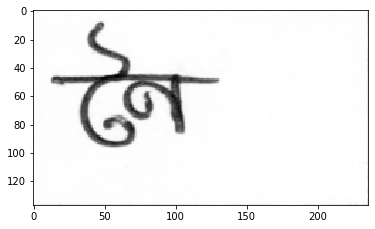

In [10]:
ob_3rd_batch = 'Train_100423'

grapheme_100423_high_res = train_X_high_res.loc[ob_3rd_batch].to_numpy()
grapheme_100423_high_res = grapheme_100423_high_res.reshape(ORIG_DIMS)
grapheme_100423_high_res = grapheme_100423_high_res / 255.0
grapheme_100423_high_res = 1.0 - grapheme_100423_high_res

print(train_y_high_res.loc[ob_3rd_batch])
plt.imshow(grapheme_100423_high_res, cmap = 'Greys')

grapheme_root          81
vowel_diacritic         8
consonant_diacritic     0
Name: Train_100423, dtype: int64


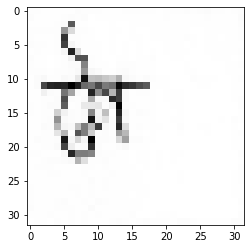

In [11]:
grapheme_100423_low_res = train_X_low_res.loc[ob_3rd_batch].to_numpy()
grapheme_100423_low_res = grapheme_100423_low_res.reshape(NEW_DIMS)

print(train_y_low_res.loc[ob_3rd_batch])
plt.imshow(grapheme_100423_low_res, cmap = 'Greys')

To conclude: All indexes match the same observation, both for the data and the targets in both datasets. The data were processed correctly